In [14]:
versionname = "baselineAL"

In [15]:
## Imports

import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
k = 30
nbags = 10
bag_contfactor = .4
seed = 1

In [17]:
## Construct dataset
# 15 bags
# 35 instances/bag
import sys
from PUMILADmain.create_ds import gen_data
from baselineAL import BaselineALMethod
from data import Data


bags, bags_labels, X_inst, y_inst = gen_data(k = k, nbags = nbags, bag_contfactor = bag_contfactor, seed = seed)
original_bag_labels = bags_labels
originalbags = Data(nbags)
originalbags.set_domains_and_labels(bags)
bags , bags_labels = BaselineALMethod._flatten(bags, bags_labels)
D= bags
bags = np.array(list(bags.values()))
nbags = 1

{1: ([-3, -4], [1.5, 1.5]), 2: ([-10, 12], [1.5, 1.5]), 3: ([-14, 4], [0.25, 3]), 4: ([7, 10], [2, 2]), 5: ([1.5, -1.5], [1, 1])}
{6: ([1, 1], [2, 0.2]), 7: ([-1, 8], [1.25, 1.75]), 8: ([10, -1], [0.5, 2]), 9: ([5, -2], [1, 2]), 10: ([3, 2], [0.5, 2]), 11: ([-8, 0], [0.75, 1]), 12: ([-10, -5], [1, 1]), 13: ([0, 0], [0.5, 0.5]), 14: ([5, -5], [1.5, 0.5]), 15: ([-5, 5], [0.5, 1]), 16: ([-1, 13.5], [4, 1])}


In [18]:
from dataBag import DataBag
from rewardInfo import RewardInfo

dataBag = DataBag(bags, bags_labels, X_inst, y_inst)
rewardInfo = RewardInfo(len(bags_labels))

clrs = ['b','g','r','c','m','k','y', 'lime','deeppink','aqua','yellow','gray','darkorange','saddlebrown','salmon']

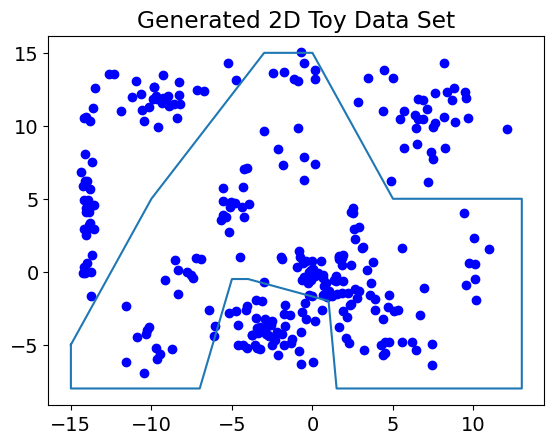

In [19]:
## Create toy data set

from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis

'''for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
    
    c=next(cycol)
    if (len(normals)>0):
        ax.scatter(normals[:,0], normals[:,1], c=c)#, c= 'b')
    if (len(anomalies)>0):
        ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c)#,c= 'b')'''

for bag in range(len(bags)):
    domain = bags[bag]
    if (len(domain)>0):
        ax.scatter(domain[:,0], domain[:,1], c=next(cycol))
        
m = np.asarray([[-15,-5],[-10,5],[-3,15], [0,15],[5,5],[13,5],[13,-8],[1.5,-8],[1,-2],[-4,-.5],[-5,-.5],[-7,-8],[-15,-8],[-15,-5]])
ax.plot(m[:,0], m[:,1])
fig.savefig('img/original.png',bbox_inches='tight')
plt.title('Generated 2D Toy Data Set')
plt.show()
plt.close(fig)


In [20]:
from data import Data
from methods import MABMethod
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve

def getPrediction(alba: MABMethod, data: Data):
    pos = {}
    neg = {}
    probabilities = alba.predict(data, True)
    return probabilities
    '''for key in predictions.keys():
        posdummy = []
        negdummy = []
        for i in range(len(predictions[key])):
            if predictions[key][i]==-1:
                negdummy.append(data.get_domain(key)[i])
            elif predictions[key][i]==1:
                posdummy.append(data.get_domain(key)[i])
        pos[key] = np.asarray(posdummy)
        neg[key] = np.asarray(negdummy)
    return neg, pos, predictions'''

def diff2dd(A, B):
    # https://stackoverflow.com/questions/8317022/get-intersecting-rows-across-two-2d-numpy-arrays
    nrows, ncols = A.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
        'formats':ncols * [A.dtype]}

    C = np.setdiff1d(A.view(dtype), B.view(dtype))

    # This last bit is optional if you're okay with "C" being a structured array...
    C = C.view(A.dtype).reshape(-1, ncols)
    return C

def noisyOr(labels):
    lst = np.zeros((len(labels.keys())))
    for bag in labels.keys():
        lbls = np.array(labels[bag])
        lbls = 1-lbls
        lst[bag] = 1-np.prod(lbls)
    return lst

def currentPrediction(alba, data, bags, newinstanceKey, instance, labeledPos = None, labeledNeg = None, t=0):
    

    '''cycol = cycle(clrs)

    fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(16,9)) 

    
    m = np.asarray([[-15,-5],[-10,5],[-3,15], [0,15],[5,5],[13,5],[13,-8],[1.5,-8],[1,-2],[-4,-.5],[-5,-.5],[-7,-8],[-15,-8],[-15,-5]])
    ax.plot(m[:,0], m[:,1])

    for bag in range(len(bags)):
        domain = bags[bag]
        pos = np.asarray(labeledPos[bag])
        neg = np.asarray(labeledNeg[bag])
        domain = diff2dd(domain, pos)
        domain = diff2dd(domain, neg)
        c = next(cycol)

        if (len(domain)>0):
            ax.scatter(domain[:,0], domain[:,1], c=c)
        
        if (len(pos)>0):
            ax.scatter(pos[:,0], pos[:,1], marker = '+', c=c)
        if (len(neg)>0):
            ax.scatter(neg[:,0], neg[:,1], marker = '_', c=c)


    plt.title('Iteration '+str(t).zfill(3))
    fig.savefig('img/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.close(fig)'''



    probabilities = getPrediction(alba, data)
    '''nrows = 3
    ncols = 4
    fig, axs = plt.subplots( nrows=nrows, ncols=ncols ,figsize=(16,9)) 
   
    m = np.asarray([[-15,-5],[-10,5],[-3,15], [0,15],[5,5],[13,5],[13,-8],[1.5,-8],[1,-2],[-4,-.5],[-5,-.5],[-7,-8],[-15,-8],[-15,-5]])
    for bag in range(len(bags)):
        ax = axs[bag//ncols, bag-ncols*(bag//ncols)]
        ax.plot(m[:,0], m[:,1])
        domain = bags[bag]
        ax.scatter(domain[:,0], domain[:,1], c =probabilities[bag], cmap = 'gray')
        if (bag == newinstanceKey):
            ax.scatter(instance[0], instance[1], c='red')


    plt.title('Iteration '+str(t).zfill(3))
    fig.savefig('colorimg/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.close(fig)'''




    fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(16,9)) 
    m = np.asarray([[-15,-5],[-10,5],[-3,15], [0,15],[5,5],[13,5],[13,-8],[1.5,-8],[1,-2],[-4,-.5],[-5,-.5],[-7,-8],[-15,-8],[-15,-5]])
    ax.plot(m[:,0], m[:,1], label ='Real boundary')
    domain = bags[0]
    z = ax.scatter(domain[:,0], domain[:,1], c =probabilities[0], cmap = 'coolwarm',  s=200, edgecolors='k')
    ax.scatter(instance[0], instance[1], c='lime',label = "Selected instance",s=400, edgecolors='k')

    scoreroc = roc_auc_score(np.rint(y_inst), probabilities[0])
    # Data to plot precision - recall curve
    precision, recall, _ = precision_recall_curve(np.rint(y_inst), probabilities[0])
    # Use AUC function to calculate the area under the curve of precision recall curve
    scorepr = auc(recall, precision)
    prs = getPrediction(alba, originalbags)
    bagprobs = noisyOr(prs)
    scorerocBag = roc_auc_score(np.rint(original_bag_labels), bagprobs)
    # Data to plot precision - recall curve
    precision, recall, _ = precision_recall_curve(np.rint(original_bag_labels), bagprobs)
    # Use AUC function to calculate the area under the curve of precision recall curve
    scoreprBag = auc(recall, precision)

    plt.title('Iteration '+str(t).zfill(3), fontsize = 16)
    rewardInfo.updateAuc("roc", scoreroc)
    rewardInfo.updateAuc("pr", scorepr)
    rewardInfo.updateAuc("rocbag", scorerocBag)
    rewardInfo.updateAuc("prbag", scoreprBag)

    
    textstr = "ROC AUC = {:.10f}\nPR AUC = {:.10f}\nROC AUC BAG= {:.10f}\nPR AUC BAG= {:.10f}".format(scoreroc, scorepr, scorerocBag, scoreprBag)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right', bbox=props)
    
    cbar = fig.colorbar(z,ax= ax, label ="higher score = more positive")
    tick_font_size = 14
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.rcParams.update({'font.size': 14})
    ax.legend(loc = "lower right", fontsize= 14)

    fig.savefig('colorimg2/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.close(fig)


In [21]:
## Create 2 domains
training_data = Data(nbags)
print(nbags)
print(D)
training_data.set_domains_and_labels(D)
query_budget = 20#30*10
alba = MABMethod(mab="rotting-swa", query_budget=query_budget, verbose=True, rewardInfo=rewardInfo, al_strategy = "entropy" )


1
{0: array([[-1.70188856e+00, -2.28291444e+00],
       [-6.45230805e+00, -2.64761392e+00],
       [-3.82782354e-01, -3.24625849e+00],
       [-4.14181035e+00, -2.64871608e+00],
       [-2.52144136e+00, -5.02559179e+00],
       [-3.37405556e+00, -4.18433534e+00],
       [-8.06838094e-01, -5.40365415e+00],
       [-6.09021106e+00, -4.40183212e+00],
       [-3.48362581e+00, -3.20446680e+00],
       [-3.57608153e+00, -5.03749113e+00],
       [-1.29934584e+00, -4.59513029e+00],
       [-4.64983690e+00, -5.03075905e+00],
       [-3.25864231e+00, -5.26780846e+00],
       [-4.31678763e+00, -5.00686920e+00],
       [-2.93667938e+00, -4.01899690e+00],
       [-2.12577718e+00, -5.67596552e+00],
       [-4.65092877e+00, -3.64837645e+00],
       [-1.35850495e+01,  4.57274645e+00],
       [-1.38144890e+01,  1.03007654e+01],
       [-1.40479589e+01,  4.36047686e+00],
       [-1.42219072e+01,  5.85160933e+00],
       [-1.41867896e+01,  4.90051096e+00],
       [-1.35768863e+01,  2.94325046e+00],
     

In [22]:
t = 0  
labeledPos = {}
labeledNeg = {}
for bag in range(len(bags)):
    labeledNeg[bag] = []
    labeledPos[bag] = []
performance = []

import warnings
warnings.filterwarnings('ignore')

while(t<query_budget):
    queries = alba.fit_query(training_data, True)

    #!!!!!!!
    key,idx = queries[0]
    i = 0
    while dataBag.isLabeled(key,idx):
        i+=1
        key, idx = queries[i]
        
    rewardInfo.chooseArm(key)
    key,idx = queries[i]
    instance = training_data.get_domain(key)[idx]
    lbl = dataBag.getLabel(key, idx)
    training_data.set_new_label(key, idx, lbl)
    training_data.set_last_labeled(key,idx)
    dataBag.label(key,idx)
    if (lbl == 1):
        labeledPos[key].append(instance.tolist())
    else:
        labeledNeg[key].append(instance.tolist())

    currentPrediction(alba, training_data, bags, key, instance, labeledPos,labeledNeg, t)
    
    #performance.append(dataBag.measureAccuracy(predictions))
    print(t)
    t += 1

## window = 10!!!

none


0
1
2


KeyboardInterrupt: 

In [ ]:
import cv2
import os

image_folder = 'img'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
print(images)
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()

image_folder = 'colorimg'
video_name = 'videocolorimg.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
print(images)
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()

image_folder = 'colorimg2'
video_name = 'videocolorimg2.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
print(images)
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()

['iteration000.png', 'iteration001.png', 'iteration002.png', 'iteration003.png', 'iteration004.png', 'iteration005.png', 'iteration006.png', 'iteration007.png', 'iteration008.png', 'iteration009.png', 'iteration010.png', 'iteration011.png', 'iteration012.png', 'iteration013.png', 'iteration014.png', 'iteration015.png', 'iteration016.png', 'iteration017.png', 'iteration018.png', 'iteration019.png', 'iteration020.png', 'iteration021.png', 'iteration022.png', 'iteration023.png', 'iteration024.png', 'iteration025.png', 'iteration026.png', 'iteration027.png', 'iteration028.png', 'iteration029.png', 'iteration030.png', 'iteration031.png', 'iteration032.png', 'iteration033.png', 'iteration034.png', 'iteration035.png', 'iteration036.png', 'iteration037.png', 'iteration038.png', 'iteration039.png', 'iteration040.png', 'iteration041.png', 'iteration042.png', 'iteration043.png', 'iteration044.png', 'iteration045.png', 'iteration046.png', 'iteration047.png', 'iteration048.png', 'iteration049.png',

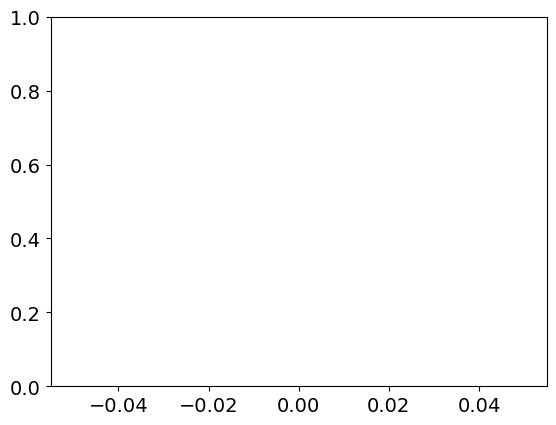

In [ ]:
plt.plot(performance)
plt.ylim([0,1])
plt.show()




## Not a lot of difference between random queries or the ALBA paper./weird choice of queries
## This makes sense!
## ALBA first selects the most promising bag and then selects an instance randomly.
## However, both bags have the same distribution, so in practice, it does not change 
# a lot which bag you pick first, because thereafter you pick a random instance and 
# the chance is a lot bigger to pick a negative instance instead of a positive one.
## So basically, ALBA right now (for same distributions) performs the same as random querying.

## The predictions are weird (a queried label is sometimes falsely predicted)
## Does this make sense because we use isolation forests? Or must the code cope with that?

## Rotting bandits paper: formula 1 unclear

[0.001680154872767224, 0.006738292987549233, 0.0062008107039582365, 0.010519703778340524, 0.01315351471934752, 0.0034063170457872983, 0.0033445405016552165, 0.009480192776826008, 0.006879736024549264, 0.0018168113897830394, 0.0037959013611917457, 0.0030843611834181937, 0.015515668097927442, 0.003635232142063288, 0.004954013847381316, 0.0024763720363819774, 0.014227178881469299, 0.0029294701874288376, 0.0014594906918196716]


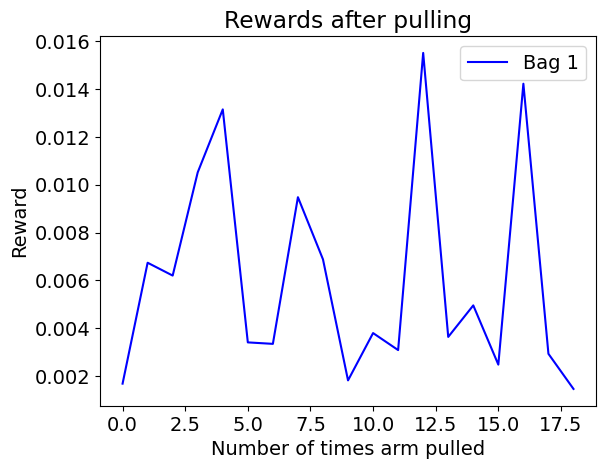

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.006949799017958339, 0.007227196622773003, 0.007684179920985801, 0.007797334141084304, 0.006346852076324725, 0.004787249849965428, 0.004733590539570578, 0.006762111805615948, 0.0057879516998221615, 0.0054669980036275035, 0.00557692477806066, 0.007315471031440252, 0.007289655865442027, 0.004946959631090732]


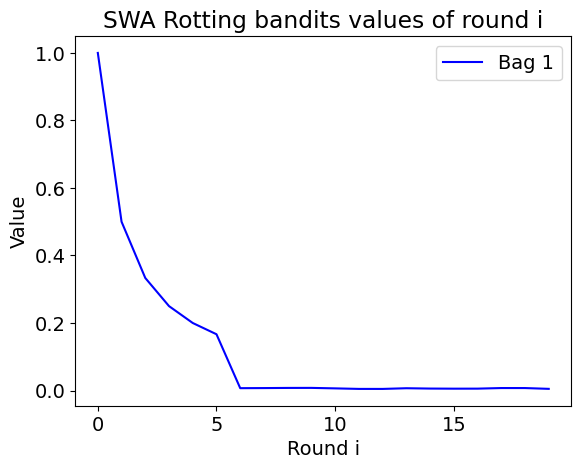

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


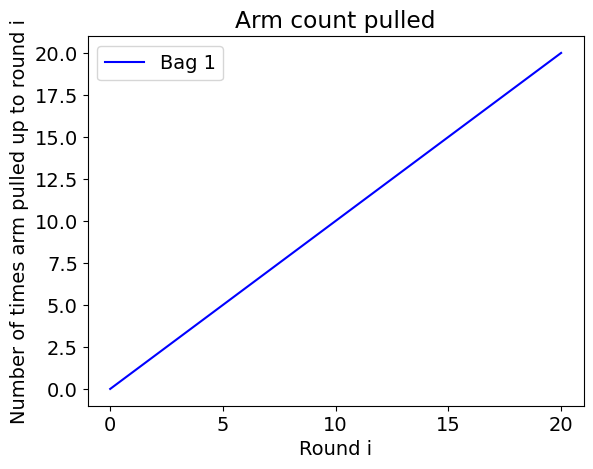

In [ ]:
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1 ) 

for bag in range(len(bags)):
    rewards = rewardInfo.getRewards(bag)
    print(rewards)
    if (len(rewards)>0):
        ax.plot(rewards, c=next(cycol))
plt.legend(["Bag "+str(i+1) for i in range(len(bags))])
plt.title('Rewards after pulling')
plt.ylabel('Reward')
plt.xlabel('Number of times arm pulled')
fig.savefig('img/rewards.png',bbox_inches='tight')
plt.show()
plt.close(fig)

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
for bag in range(len(bags)):
    rewards = rewardInfo.getBanditRewards(bag)
    print(rewards)
    if (len(rewards)>0):
        ax.plot(rewards, c=next(cycol))
plt.legend(["Bag "+str(i+1) for i in range(len(bags))])
plt.title('SWA Rotting bandits values of round i')
plt.ylabel('Value')
plt.xlabel('Round i')
fig.savefig('img/rewardsSWA.png',bbox_inches='tight')
plt.show()
plt.close(fig)

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
for bag in range(len(bags)):
    rewards = rewardInfo.getChosenArm(bag)
    print(rewards)
    if (len(rewards)>0):
        ax.plot(rewards, c=next(cycol))
plt.legend(["Bag "+str(i+1) for i in range(len(bags))])
plt.title('Arm count pulled')
plt.ylabel('Number of times arm pulled up to round i')
plt.xlabel('Round i')
fig.savefig('img/rewardsChosen.png',bbox_inches='tight')
plt.show()
plt.close(fig)


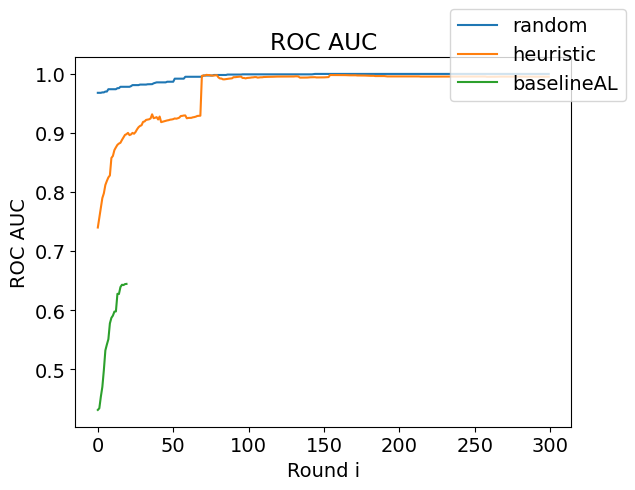

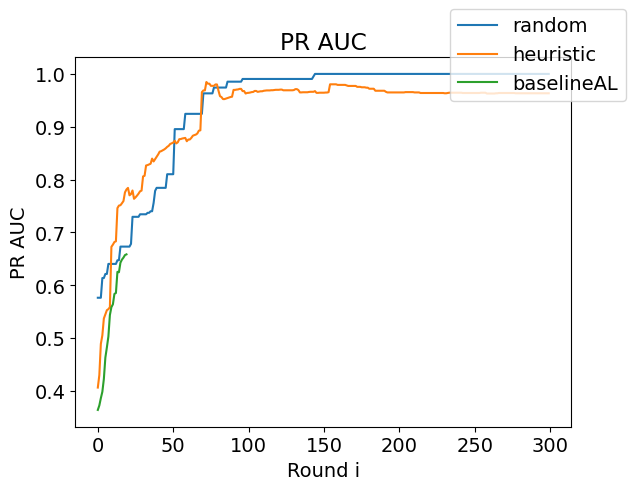

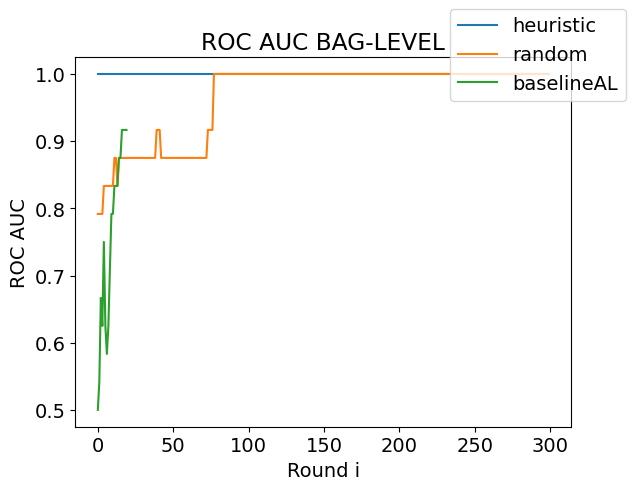

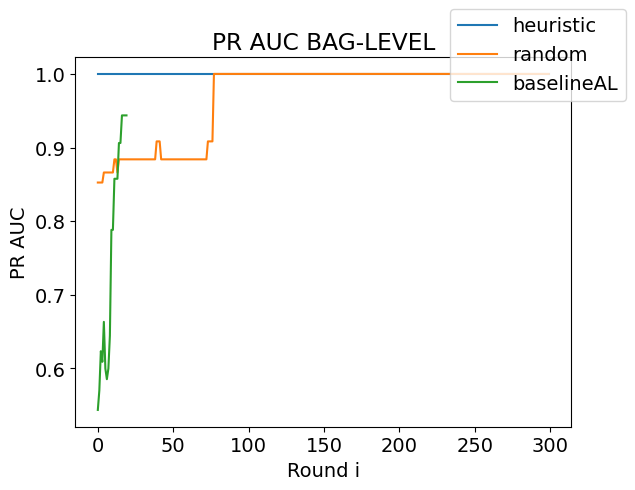

In [ ]:
t = rewardInfo.getIterationEndRoundRobin()

'''cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
for bag in range(len(bags)):
    rewards = rewardInfo.getBanditRewards(bag)
    print(rewards)
    if (len(rewards)>0):
        ax.plot(range(t, t+len(rewards[t:])),rewards[t:], c=next(cycol))
plt.legend(["Bag "+str(i+1) for i in range(len(bags))])
plt.title('SWA Rotting bandits values of round i')
plt.ylabel('Value')
plt.xlabel('Round i')
fig.savefig('img/rewardsSWAAfterRR.png',bbox_inches='tight')
plt.show()
plt.close(fig)

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1 ) 
for bag in range(len(bags)):
    rewards = rewardInfo.getChosenArm(bag)
    print(rewards)
    if (len(rewards)>0):
        ax.plot(range(t, t+len(rewards[t:])),rewards[t:], c=next(cycol))
plt.legend(["Bag "+str(i+1) for i in range(len(bags))])
plt.title('Arm count pulled')
plt.ylabel('Number of times arm pulled up to round i')
plt.xlabel('Round i')
fig.savefig('img/rewardsChosenAfterRR.png',bbox_inches='tight')
plt.show()
plt.close(fig)
'''

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1)#, figsize = (16,9) ) 
scores = rewardInfo.getAUC()["roc"]
import csv
with open('auc_roc.csv', 'r') as readFile:
    reader = csv.reader(readFile)
    lines = list(reader)
    flag = True
    for i in range(len(lines)):
        if lines[i][0] == versionname:
            lines[i] = [versionname] + scores
            flag = False
    if flag:
        lines.append([versionname] + scores)
        
with open('auc_roc.csv', 'w',newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

for line in lines:
    ax.plot([float(i) for i in line[1:]], label = line[0])
plt.title('ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Round i')
fig.savefig('img/ROC AUC.png',bbox_inches='tight')
fig.legend()
plt.show()
plt.close(fig)

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1)#, figsize = (16,9) ) 
scores = rewardInfo.getAUC()["pr"]
import csv
with open('auc_pr.csv', 'r') as readFile:
    reader = csv.reader(readFile)
    lines = list(reader)
    flag = True
    for i in range(len(lines)):
        if lines[i][0] == versionname:
            lines[i] = [versionname] + scores
            flag = False
    if flag:
        lines.append([versionname] + scores)
        
with open('auc_pr.csv', 'w',newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

for line in lines:
    ax.plot([float(i) for i in line[1:]], label = line[0])
plt.title('PR AUC')
plt.ylabel('PR AUC')
plt.xlabel('Round i')
fig.savefig('img/PR AUC.png',bbox_inches='tight')
fig.legend()
plt.show()
plt.close(fig)


## BAGLEVEL

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1)#, figsize = (16,9) ) 
scores = rewardInfo.getAUC()["rocbag"]
import csv
with open('auc_roc_bag.csv', 'r') as readFile:
    reader = csv.reader(readFile)
    lines = list(reader)
    flag = True
    for i in range(len(lines)):
        if lines[i][0] == versionname:
            lines[i] = [versionname] + scores
            flag = False
    if flag:
        lines.append([versionname] + scores)
        
with open('auc_roc_bag.csv', 'w',newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

for line in lines:
    ax.plot([float(i) for i in line[1:]], label = line[0])
plt.title('ROC AUC BAG-LEVEL')
plt.ylabel('ROC AUC')
plt.xlabel('Round i')
fig.savefig('img/ROC AUC BAG.png',bbox_inches='tight')
fig.legend()
plt.show()
plt.close(fig)

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1)#, figsize = (16,9) ) 
scores = rewardInfo.getAUC()["prbag"]
import csv
with open('auc_pr_bag.csv', 'r') as readFile:
    reader = csv.reader(readFile)
    lines = list(reader)
    flag = True
    for i in range(len(lines)):
        if lines[i][0] == versionname:
            lines[i] = [versionname] + scores
            flag = False
    if flag:
        lines.append([versionname] + scores)
        
with open('auc_pr_bag.csv', 'w',newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

for line in lines:
    ax.plot([float(i) for i in line[1:]], label = line[0])
plt.title('PR AUC BAG-LEVEL')
plt.ylabel('PR AUC')
plt.xlabel('Round i')
fig.savefig('img/PR AUC BAG.png',bbox_inches='tight')
fig.legend()
plt.show()
plt.close(fig)